In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
heart = pd.read_csv(url, names = names)
heart.head(5).append(heart.tail(5)) 

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [3]:
heart.shape

(303, 14)

In [4]:
heart.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n'], dtype='object')

In [5]:
heart.head(5).append(heart.tail(5)) 

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
heart.n.unique()

array([0, 2, 1, 3, 4])

In [48]:
heart['attack_risk'] = np.where(heart['n']==0, 0, 1) 
for index in heart.columns:
  heart[index] = np.where(heart[index]=='?', 0, heart[index])

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [49]:
heart.head(5).append(heart.tail(5))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,attack_risk
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0,3.0,0,0


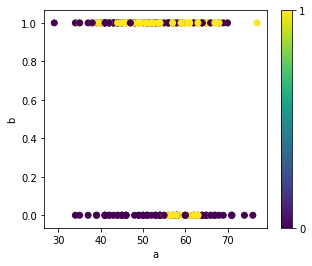

In [50]:
le = preprocessing.LabelEncoder()
le.fit(heart.attack_risk.drop_duplicates())
heart.attack_risk = le.transform(heart.attack_risk)


x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(5, 4))
plt.scatter(heart.iloc[:, x], heart.iloc[:, y],c=heart.attack_risk)
plt.colorbar(ticks=[0, 1])
plt.xlabel(names[x]);
plt.ylabel(names[y]);

In [51]:
heart.attack_risk.unique()

array([0, 1])

In [52]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
a              303 non-null float64
b              303 non-null float64
c              303 non-null float64
d              303 non-null float64
e              303 non-null float64
f              303 non-null float64
g              303 non-null float64
h              303 non-null float64
i              303 non-null float64
j              303 non-null float64
k              303 non-null float64
l              303 non-null object
m              303 non-null object
n              303 non-null int64
attack_risk    303 non-null int64
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [53]:
pip install sns

In [0]:
import seaborn as sns

count    303.000000
mean       0.458746
std        0.499120
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: attack_risk, dtype: float64


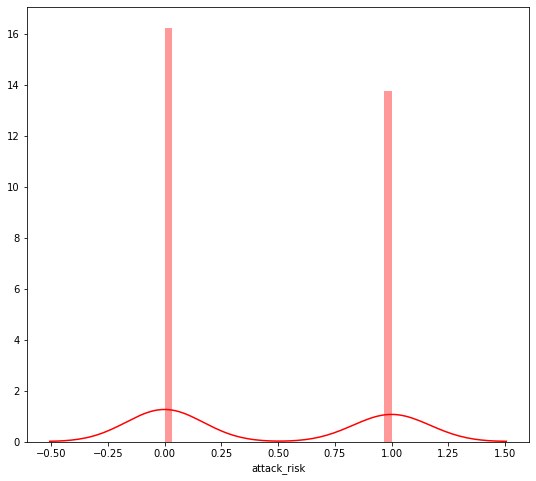

In [55]:
print(heart['attack_risk'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(heart['attack_risk'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [0]:
train_df = heart.copy()

In [57]:
train_df = train_df.drop('n', axis=1)
train_df.head(2)

,a,b,c,d,e,f,g,h,i,j,k,l,m,attack_risk
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1


In [0]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [0]:
y = heart.attack_risk

In [0]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split

In [0]:
X = train_df.iloc[:,0:13]
y = heart.iloc[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [62]:
X_train

,a,b,c,d,e,f,g,h,i,j,k,l,m
33,59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0
123,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0
61,46.0,0.0,3.0,142.0,177.0,0.0,2.0,160.0,1.0,1.4,3.0,0.0,3.0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0
128,44.0,1.0,2.0,120.0,220.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,0
197,45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0
174,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0


In [63]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: attack_risk, Length: 303, dtype: int64

In [0]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

In [0]:
gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 #n_jobs = -1,
                                 refit=True)


In [66]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2019-11-25 14:59:46.622297
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2019-11-25 14:59:54.766826
0:00:08.144529


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    8.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
print(gsm.best_score_)

0.6911764705882353


In [68]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 4,
 'metric': 'manhattan',
 'weights': 'uniform'}

In [69]:
print(gsm.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [0]:
n_neighbors = [1,3,5,7,9]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

KNN for k =  1
[1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1]


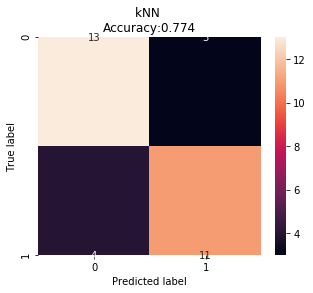

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.79      0.73      0.76        15

    accuracy                           0.77        31
   macro avg       0.78      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31

KNN for k =  3
[1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1]


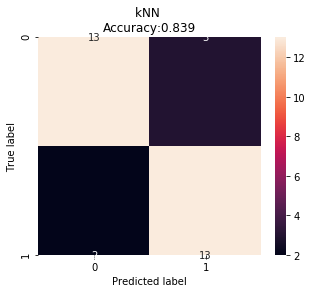

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.81      0.87      0.84        15

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

KNN for k =  5
[1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1]


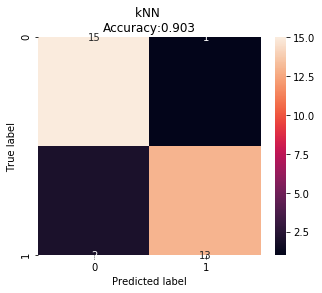

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.93      0.87      0.90        15

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

KNN for k =  7
[1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1]


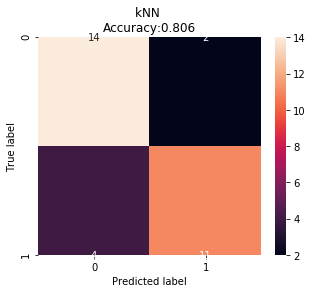

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.85      0.73      0.79        15

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

KNN for k =  9
[1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1]


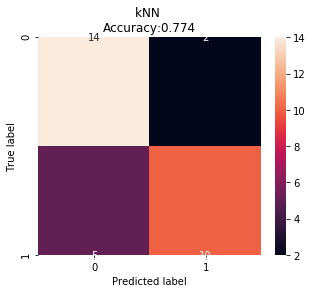

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.83      0.67      0.74        15

    accuracy                           0.77        31
   macro avg       0.79      0.77      0.77        31
weighted avg       0.78      0.77      0.77        31



In [73]:
for k in n_neighbors:
  best_KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='uniform')
  best_KNC = best_KNC.fit(X_train, y_train)
  risk_predictor = best_KNC.predict(X_test)
  print("KNN for k = ", k)
  print(risk_predictor)

  cm = confusion_matrix(y_test, risk_predictor) 
  cm_df = pd.DataFrame(cm,
                     index = [0, 1], 
                     columns = [0, 1])

  plt.figure(figsize=(5,4)) 0.903
  sns.heatmap(cm_df, annot=True)
  plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, risk_predictor)))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  print(classification_report(y_test, risk_predictor))

In [0]:
print(classification_report(y_test, risk_predictor))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.80      0.80      0.80        15

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

